## PROJECT OBJECTIVE AND ANALYSIS ROADMAP

In the previous project, we analyzed the factors that influence the success of a game on Steam. Now, we will conduct a similar study for the Google Play Store. To start, we will provide an overview of the dataset, including the number of games released on the platform, the evolution of downloads, and the average rating by year of release.

Next, we will analyze three different variables that affect games on the Google Play Store. 

- Price groups: we will differentiate between free games and paid games, as the dominance of free games is apparent on this platform. Unlike in the Steam project, we will not differentiate between different price ranges, as it does not contribute information to our analysis. We will analyze the differences in releases, downloads, ratings, and top 100 distribution between paid and free games.

- Genres: examine genres and their impact on downloads and ratings. We will identify the most successful genres and investigate if gender has any effect on game success.

- Developers: we will look at the distribution of publishers in the marketplace and identify the dominant publishers in the top 100. We will also explore which developers create the most successful games.

Overall, our analysis of the Google Play Store will provide insight into the factors that contribute to game success on this platform.

## ABOUT THE DATASET


The original dataset can be found on Kaggle: https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps. The dataset used in this analysis includes information about all the apps available in the Google Play Store, not just games. To focus solely on games, we carried out a cleanup process to filter out all non-game apps. We also removed any null values and duplicate entries and created new columns to better suit our analysis. Additionally, we adjusted information from existing columns to ensure that our dataset was optimized for our specific analysis of the Google Play Store game marketplace.
The cleaning process can be found at: 

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter, FuncFormatter

In [2]:
google = pd.read_csv('google_clean.csv')
google

,Unnamed: 0,App Name,Category,Rating,Rating Count,Price,Developer Id,Released,Last Updated,Content Rating,Ad Supported,In App Purchases,Price_Type,Type,Downloads,Year_Release
0,0,Gakondo,Adventure,0.0,0,0.00,Jean Confident Irénée NIYIZIBYOSE,2020-02-26,"Feb 26, 2020",Everyone,False,False,Free-to-Play,Free,12,2020
1,10,Dodge The Cars!,Racing,4.9,55,0.00,MrScratch,2020-07-30,"Jul 30, 2020",Everyone,False,False,Free-to-Play,Free,214,2020
2,22,Block Fill: Puzzle Game,Puzzle,4.4,211,0.00,MailBee Games,2020-03-13,"May 11, 2020",Everyone,True,True,Free-to-Play,Free,12735,2020
3,25,Sticky Ball,Arcade,4.6,11,0.00,Mitochondria Studios,2018-03-05,"Mar 26, 2018",Everyone,True,True,Free-to-Play,Free,126,2018
4,26,CUBIC RUNNER,Arcade,0.0,0,0.00,GA software,2015-04-01,"Apr 16, 2015",Everyone,True,True,Free-to-Play,Free,1034,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303665,2312904,Ama Puzzle,Puzzle,0.0,0,0.00,adeshek,2020-04-17,"Jun 27, 2020",Everyone,True,False,Free-to-Play,Free,119,2020
303666,2312910,Brain Color - Colorful Puzzles,Puzzle,0.0,0,0.00,Alexis Leblond,2018-03-11,"May 01, 2018",Everyone,True,False,Free-to-Play,Free,17,2018
303667,2312927,Gear Ratio Calculator,Sports,0.0,0,2.49,ABT,2012-06-19,"Nov 09, 2012",Everyone,False,False,Cheap,Paid,150,2012
303668,2312932,Hopeless 2: Cave Escape,Action,4.3,103466,0.00,Upopa Games,2015-10-29,"Mar 06, 2017",Teen,True,True,Free-to-Play,Free,6137330,2015


## GENERAL OVERVIEW

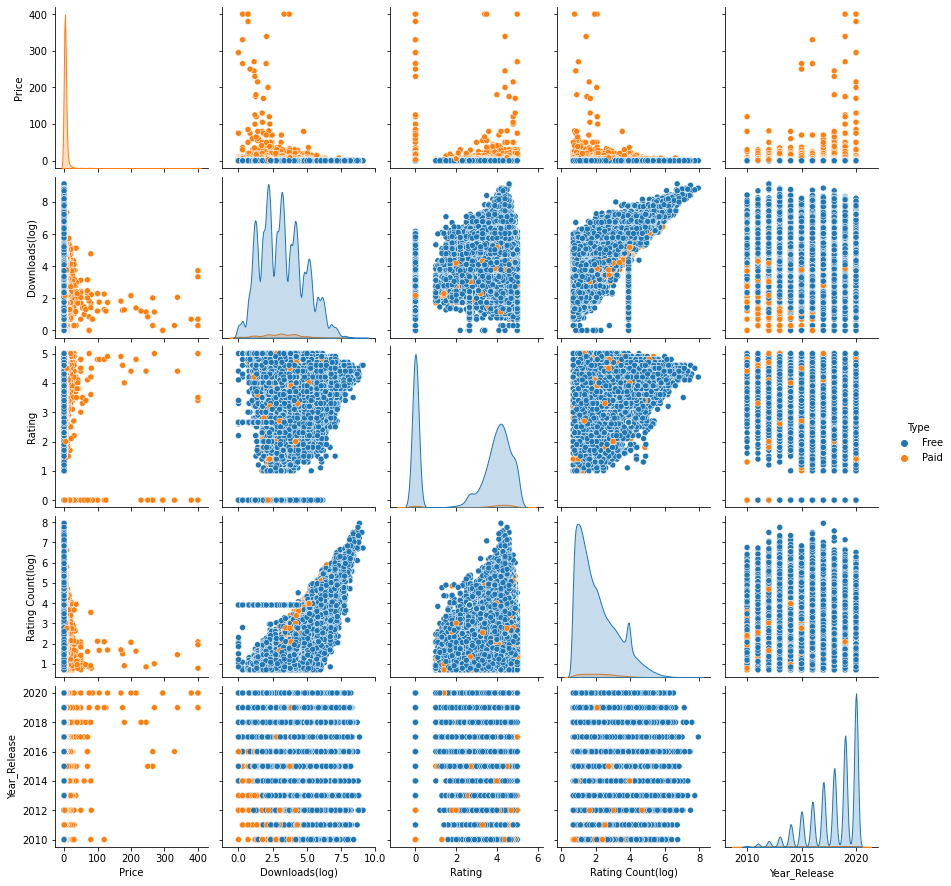

In [73]:
df = google[(google['Downloads'] > 0) & (google['Rating Count']>= 0)].copy()
eda_df = pd.DataFrame(zip(df['Price'],
                         np.log10(df['Downloads']),
                         df['Rating'],
                         np.log10(df['Rating Count']),
                         df['Year_Release'],
                         df['Type']),
                     columns = ['Price','Downloads(log)','Rating','Rating Count(log)','Year_Release','Type'])
sns.pairplot(eda_df, hue='Type')
plt.show()

By looking at the relationship between the features, we can see that most of the games are free. The number of games released has been increasing over time, most of the games have a rating of 0(this could mean having no rating at all). Let's take a deeper look at each of the variables.

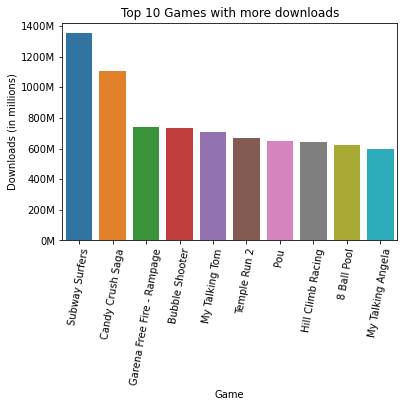

In [4]:
most_downloaded_games = google.groupby('App Name').agg({'Downloads':'sum'}).reset_index().sort_values(by='Downloads', ascending=False).head(10)
def millions_formatter(x,pos):
    return '{:.0f}M'.format(x/1000000)
sns.barplot(x='App Name', y='Downloads', data = most_downloaded_games)
plt.title("Top 10 Games with more downloads")
plt.xlabel('Game')
plt.ylabel('Downloads (in millions)')
plt.xticks(rotation=80)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

The first thing that stands out is the big difference in downloads compared to Steam. On Steam, the clear dominator was Dota2 with 150M downloads and the rest of the games in the top 10 were below 100M. On Google Play sotre, we have 2 games above 1000M downloads and the top 10 does not go below 500M. We can draw one of the first conclusions, the volume of downloads in the Google Play Store is much higher than in Steam.

<Figure size 720x432 with 0 Axes>

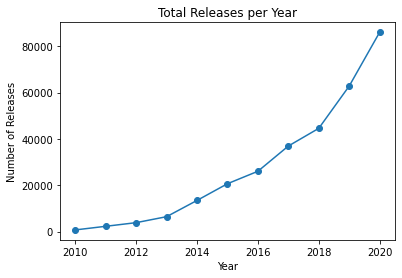

In [5]:
releases_year = google.groupby('Year_Release').agg({'App Name':'count'}).reset_index()
fig = plt.figure(figsize=(10,6))
ax = releases_year.plot(x='Year_Release', y ='App Name', kind='line',marker = 'o', legend=None)
ax.set_xlabel('Year')
ax.set_ylabel('Number of Releases')
ax.set_title('Total Releases per Year')
plt.show()


<Figure size 720x432 with 0 Axes>

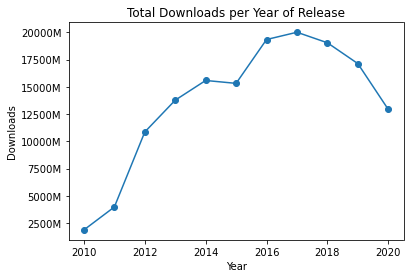

In [6]:
def millions_formatter(x,pos):
    return '{:.0f}M'.format(x/1000000)
downloads_release = google.groupby('Year_Release').agg({'Downloads':'sum'}).reset_index()
fig = plt.figure(figsize=(10,6))
ax = downloads_release.plot(x='Year_Release', y ='Downloads', kind='line',marker = 'o', legend=None)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
ax.set_xlabel('Year')
ax.set_ylabel('Downloads')
ax.set_title('Total Downloads per Year of Release')
plt.show()

Both graphs group the data by year of release. For example, the total downloads graph is not about how many gam the total downloads graph is not about how many games have been downloaded each year. The graph groups the games by year of release and sums how many downloads each year had. As happened with the steam dataset, we do not have access to when each game is downloaded. In any case, with the year of release, we can analyze if the newer games have better performance than the old ones.
- Each year we have more game releases in the Google Play Storem with this tendency accelerating in the last years.
- We see an increase in the downloads of games  until 2017. After 2017, we see a decrease in the downloads of new games. 


<Figure size 720x432 with 0 Axes>

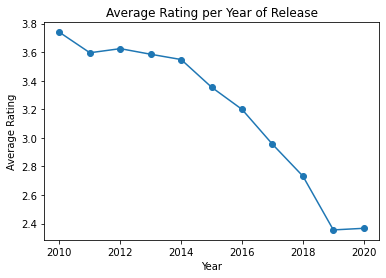

In [7]:
rating_release = google.groupby('Year_Release')['Rating'].mean().reset_index()
fig = plt.figure(figsize=(10,6))
ax = rating_release.plot(x='Year_Release', y ='Rating', kind='line',marker = 'o', legend=None)
ax.set_xlabel('Year')
ax.set_ylabel('Average Rating')
ax.set_title('Average Rating per Year of Release')
plt.show()

In [8]:
total_releases = google.groupby('Year_Release').agg({
    "App Name":"count"}).reset_index()
average_rating = google.groupby('Year_Release').agg({
    "Rating":"mean"}).reset_index()
import scipy.stats as stats
r, p_value = stats.pearsonr(total_releases['App Name'], average_rating['Rating'])
print(f'Correlation coefficient (r): {r}\np-value: {p_value}')

Correlation coefficient (r): -0.9727958909056242
p-value: 5.084717806569223e-07


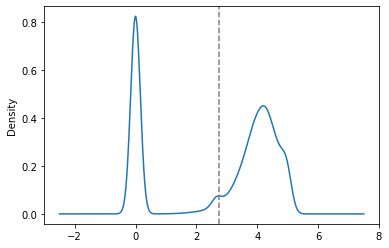

The average rating is: 2.7342030754808726


In [9]:
avg_rating = google['Rating'].mean()
plt.figure()
google['Rating'].plot(kind='density')
plt.axvline(x=avg_rating, color='grey', linestyle='--')
plt.show()
print('The average rating is:', avg_rating)

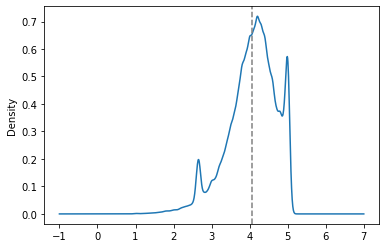

The average rating is: 4.05792185137298


In [10]:
rating_above_1 = google[google['Rating']>=1]
avg_rating = rating_above_1['Rating'].mean()
plt.figure()
rating_above_1['Rating'].plot(kind='density')
plt.axvline(x=avg_rating, color='grey', linestyle='--')
plt.show()
print('The average rating is:', avg_rating)

When looking at rating, we can take some conclusions:
- Average rating has been declining year by year. As happened in the steam project, the number of releases has a strong negative relationship with the average rating of games.
- Most of the games have no rating at all. When removing these games, we see that the average rating is around 4 out of 5. So, most games do not get a rating, but once the game achieves to get a rating from players, players rate the game really high. 

In [11]:
print(f'Games with fewer than 20,000 downloads: {google[google.Downloads < 20000].shape[0]}\n',
      f'Games with more than 20,000 downloads: {google[google.Downloads >= 20000].shape[0]}')

print(f'Games with fewer than 100,000 downloads: {google[google.Downloads < 100000].shape[0]}\n',
      f'Games with more than 100,000 downloads: {google[google.Downloads >= 100000].shape[0]}')

print(f'Games with fewer than 1M downloads: {google[google.Downloads < 1000000].shape[0]}\n',
      f'Games with more than 1M downloads: {google[google.Downloads >= 1000000].shape[0]}')

print(f'Games with fewer than 10M downloads: {google[google.Downloads < 10000000].shape[0]}\n',
      f'Games with more than 10M downloads: {google[google.Downloads >= 10000000].shape[0]}')

Games with fewer than 20,000 downloads: 230835
 Games with more than 20,000 downloads: 72835
Games with fewer than 100,000 downloads: 254056
 Games with more than 100,000 downloads: 49614
Games with fewer than 1M downloads: 286067
 Games with more than 1M downloads: 17603
Games with fewer than 10M downloads: 300358
 Games with more than 10M downloads: 3312


In [12]:
print(f'games with no downloads: {google[google.Downloads == 0].shape[0]}')
print(f'games with no rating: {google[google.Rating == 0].shape[0]}')
print(f'Games with fewer than 10,000 downloads: {google[google.Downloads < 10000].shape[0]}')

games with no downloads: 665
games with no rating: 99059
Games with fewer than 10,000 downloads: 204975


The Google Play Store is a highly competitive market. From the 303670 games that we are analyzing, just 72835 have more than 20k downloads(only a 23%).  Only a 5,8% surpass 1M downloads. The Google Play Store is a marketplace with a lot of user traffic and games have the potential to reach a huge number of downloads. Despite this, a lot of games are competing for the same pot, what makes it really hard to get your game over 20k downloads. 

In [13]:
google_sorted = google.sort_values(by='Downloads', ascending = False)[['App Name', 'Downloads']].head(100)
top_100 = google_sorted.nlargest(100, 'Downloads')
google_100 = top_100.iloc[99]
print(google_100['Downloads'])

138221626


For a game to be part of the top 100 games with the most downloads, it has to exceed 140M downloads. On Steam, the top 100 started at 750k downloads. We see a big difference.

### PRICING

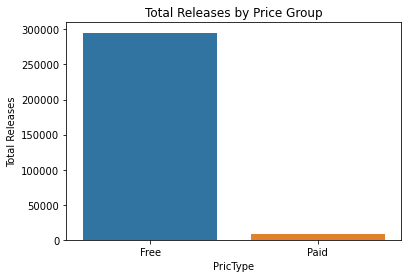

In [14]:
releases = google.groupby(['Type']).agg({'App Name':'count'}).reset_index()
ax = sns.barplot(x='Type', y='App Name', data = releases)
ax.set(xlabel='PricType', ylabel='Total Releases')
ax.set_title('Total Releases by Price Group')
plt.show()

In [15]:
releases

,Type,App Name
0,Free,295319
1,Paid,8351


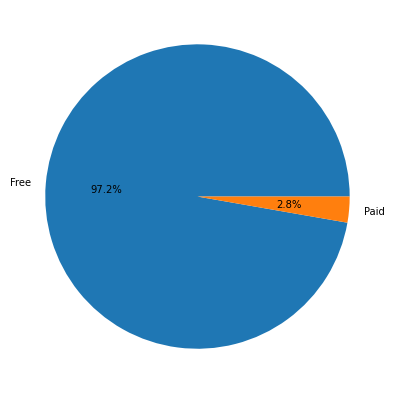

In [16]:
fig = plt.figure(figsize =(10, 7))
plt.pie(releases['App Name'], labels = releases.Type, autopct= '%1.1f%%')
plt.show()

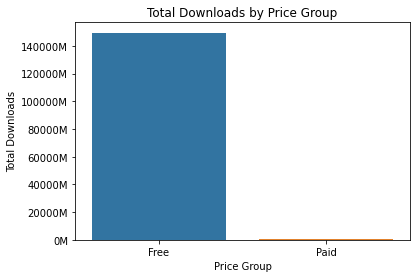

In [17]:
total_owner_price = google.groupby(['Type']).agg({'Downloads':'sum'}).reset_index()
ax = sns.barplot(x='Type', y='Downloads', data = total_owner_price)
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
ax.set(xlabel='Price Group', ylabel='Total Downloads')
ax.set_title('Total Downloads by Price Group')
plt.show()

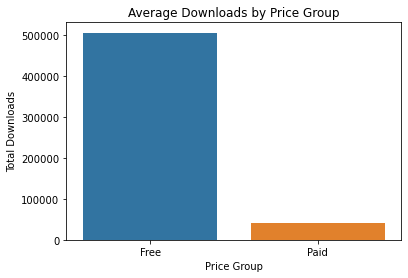

In [18]:
avg_owner_price = google.groupby(['Type']).agg({'Downloads':'mean'}).reset_index()
ax = sns.barplot(x='Type', y='Downloads', data = avg_owner_price)
ax.set(xlabel='Price Group', ylabel='Total Downloads')
ax.set_title('Average Downloads by Price Group')
plt.show()

In [19]:
top100 = google.sort_values(by='Downloads', ascending = False)[['App Name', 'Downloads', 'Type']].head(100)
top100_count = top100.groupby(['Type']).agg({'Downloads':'count'}).reset_index()
top100_count

,Type,Downloads
0,Free,100


As we have seen before, Free games dominate the Google Play Store:
- 97% of the games released are free.
- Free games dominate in downloads and also in average downloads. In the Steam marketplace analysis, we saw tha the most expensive games were the least released but on average, have more downloads that the rest of games. In the Google Play marketplace, that is not the case. Free games have by far more downloads and despite being the more relased type of game, on average do also perform better than paid games. 
- In the top 100 games with more downloads, we only have free games.



In [63]:
columns = ['+0k','-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']
prices = google[['App Name', 'Downloads', 'Type']]
import warnings
warnings.filterwarnings('ignore')
prices['0k'] = np.where(prices['Downloads']==0 , 1, 0)
prices['0-10k'] = np.where((prices['Downloads']< 10000) &(prices['Downloads']>0), 1, 0)
prices['+10k'] = np.where((prices['Downloads']>= 10000)&(prices['Downloads']<50000), 1, 0)
prices['+50k'] = np.where((prices['Downloads'] >= 50000)&(prices['Downloads']<100000), 1, 0)
prices['+100k'] = np.where((prices['Downloads'] >= 100000)&(prices['Downloads']<500000), 1, 0)
prices['+500k'] = np.where((prices['Downloads'] >= 500000) &(prices['Downloads']<1000000), 1, 0)
prices['+1M'] = np.where((prices['Downloads'] >= 1000000)&(prices['Downloads']<10000000), 1, 0)
prices['+10M'] = np.where((prices['Downloads'] >= 10000000)&(prices['Downloads']<100000000), 1, 0)
prices['+100M'] = np.where((prices['Downloads'] >= 100000000)&(prices['Downloads']<1000000000), 1, 0)
prices['+1000M'] = np.where(prices['Downloads'] >= 1000000000, 1, 0)

prices

,App Name,Downloads,Type,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
218678,Asteroid Shooter,55,Free,0,1,0,0,0,0,0,0,0,0
301767,The Last Vampire,266,Free,0,1,0,0,0,0,0,0,0,0
97791,Ghost Arena,27,Free,0,1,0,0,0,0,0,0,0,0
153868,Asteroid Blaster,2,Free,0,1,0,0,0,0,0,0,0,0
97790,Endless Arena 2D,271,Free,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195130,Tapmaca,112830,Free,0,0,0,0,1,0,0,0,0,0
195105,Don't Tell Me,26,Free,0,1,0,0,0,0,0,0,0,0
195029,Trivia Together,66,Free,0,1,0,0,0,0,0,0,0,0
195314,Love Me Quiz,125,Free,0,1,0,0,0,0,0,0,0,0


In [64]:
columns = ['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']
pivot = prices.pivot_table(index='Type', values = columns, aggfunc=np.sum).sort_index()
pivot

,+1000M,+100M,+100k,+10M,+10k,+1M,+500k,+50k,0-10k,0k
Type,,,,,,,,,,
Free,2,222,23618,3085,35092,14219,7882,12426,198248,525
Paid,0,0,428,3,1229,72,83,334,6062,140


In [65]:
pivot = pivot[['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']]
pivot

,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
Type,,,,,,,,,,
Free,525,198248,35092,12426,23618,7882,14219,3085,222,2
Paid,140,6062,1229,334,428,83,72,3,0,0


In [66]:
total_games = prices.groupby('Type').size()
free_games = prices[prices['Type'] == 'Free']
free_percentages = (free_games[columns].sum() / total_games['Free']) * 100

paid_games = prices[prices['Type'] != 'Free']
paid_percentages = (paid_games[columns].sum() / total_games['Paid']) * 100

pivot.loc['Free %'] = free_percentages
pivot.loc['Paid %'] = paid_percentages

pivot

,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
Type,,,,,,,,,,
Free,525.000000,198248.000000,35092.000000,12426.000000,23618.000000,7882.000000,14219.000000,3085.000000,222.000000,2.000000
Paid,140.000000,6062.000000,1229.000000,334.000000,428.000000,83.000000,72.000000,3.000000,0.000000,0.000000
Free %,0.177774,67.130120,11.882744,4.207653,7.997454,2.668978,4.814793,1.044633,0.075173,0.000677
Paid %,1.676446,72.590109,14.716800,3.999521,5.125135,0.993893,0.862172,0.035924,0.000000,0.000000


In [67]:
free_games

,App Name,Downloads,Type,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
218678,Asteroid Shooter,55,Free,0,1,0,0,0,0,0,0,0,0
301767,The Last Vampire,266,Free,0,1,0,0,0,0,0,0,0,0
97791,Ghost Arena,27,Free,0,1,0,0,0,0,0,0,0,0
153868,Asteroid Blaster,2,Free,0,1,0,0,0,0,0,0,0,0
97790,Endless Arena 2D,271,Free,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195130,Tapmaca,112830,Free,0,0,0,0,1,0,0,0,0,0
195105,Don't Tell Me,26,Free,0,1,0,0,0,0,0,0,0,0
195029,Trivia Together,66,Free,0,1,0,0,0,0,0,0,0,0
195314,Love Me Quiz,125,Free,0,1,0,0,0,0,0,0,0,0


In [68]:
pivot_perc = pivot.tail(2).copy()
pivot_perc

,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
Type,,,,,,,,,,
Free %,0.177774,67.130120,11.882744,4.207653,7.997454,2.668978,4.814793,1.044633,0.075173,0.000677
Paid %,1.676446,72.590109,14.716800,3.999521,5.125135,0.993893,0.862172,0.035924,0.000000,0.000000


When we look at the distribution of the games in the different ranges of downloads,we see that free games perform better than paid games. The only ranges where paid games have more games than free games are in the worse ranges: 0 downloads games and less than 10k downloads. The distribution of the downloads of free games strengthens our previous analysis on the difficulty of bringing a game to a large number of downloads. Most of the games are situated between 0 and 100 k downloads. 

[Text(0, 0, 'Free'), Text(1, 0, 'Paid')]

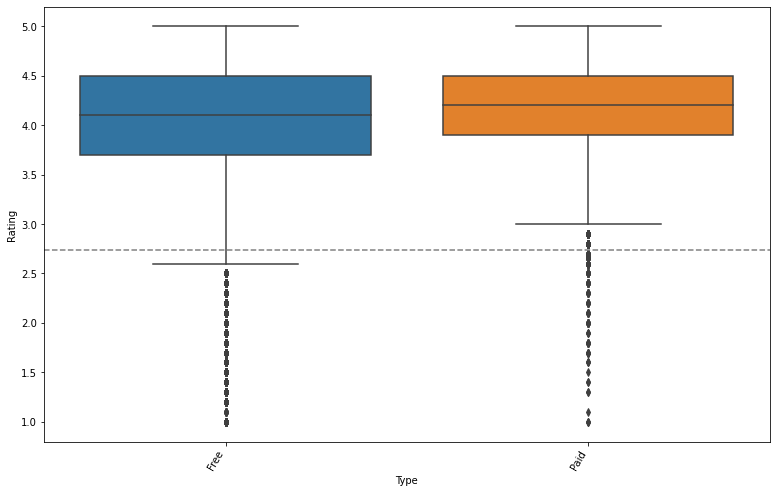

In [25]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x='Type', y='Rating', data = rating_above_1)
mean_rating = google['Rating'].mean()
plt.axhline(y=mean_rating, color='grey', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")

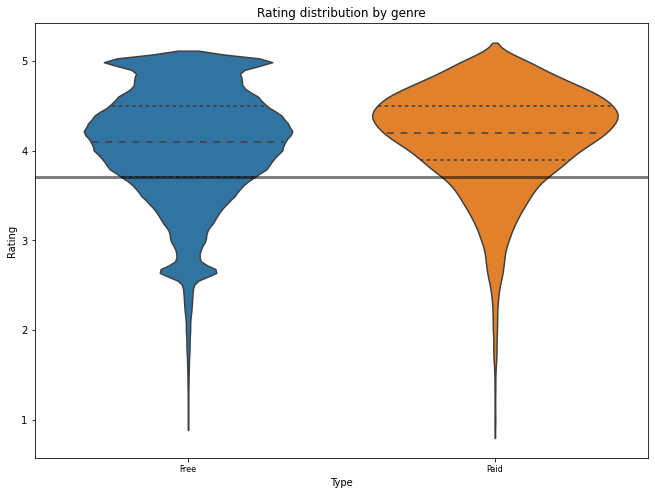

In [26]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.violinplot(x='Type', y='Rating', data=rating_above_1, inner='quartile')
ax.axhline(google.Rating.median(), color='black', lw=3, alpha=.5)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre");
plt.show()

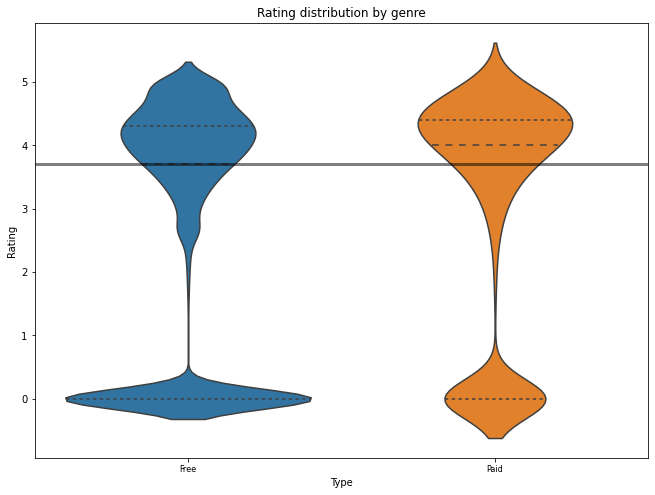

In [27]:
fig, ax = plt.subplots(figsize=(11,8))
ax = sns.violinplot(x='Type', y='Rating', data=google, inner='quartile')
ax.axhline(google.Rating.median(), color='black', lw=3, alpha=.5)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre");
plt.show()

In [28]:
average_rating = google.groupby('Type')['Rating'].mean()
print(average_rating)

Type
Free    2.724928
Paid    3.062217
Name: Rating, dtype: float64


In [29]:
average_rating = rating_above_1.groupby('Type')['Rating'].mean()
print(average_rating)

Type
Free    4.055409
Paid    4.138626
Name: Rating, dtype: float64


For both price types we have a similar distribution of ratings. Most of the games have 0 rating or are around a 4 rating. Free games have relatively a higher quantity of games with no ratings or 0 rating. This could be produce by the sunk cost of paying for a game. The fact that you pay for a game can lead you to want to give it a rating. As we have seen before, once the game is rated, the rating is near a 4 out of 5, so a high rating. We have a clear segmentation in the quality of the games. Bad games receive a bad rating or no rating at all, while good games directly jump to a rating of 4. We have few games in the 0.5-3.5 range.

In [30]:
free = google[google['Type'] == 'Free']
paid = google[google['Type'] == 'Paid']
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd #import the function for a pairwise Tukey HSD test

#The p-value can be obtained by using f_oneway test
fval, pval = f_oneway(free['Rating'],paid['Rating'])
print(fval)
print(pval)


237.4560448812328
1.4781969958100543e-53


In [31]:
free = rating_above_1[rating_above_1['Type'] == 'Free']
paid = rating_above_1[rating_above_1['Type'] == 'Paid']
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd #import the function for a pairwise Tukey HSD test

#The p-value can be obtained by using f_oneway test
fval, pval = f_oneway(free['Rating'],paid['Rating'])
print(fval)
print(pval)

101.87627038198818
5.986907987515304e-24


### GENRES

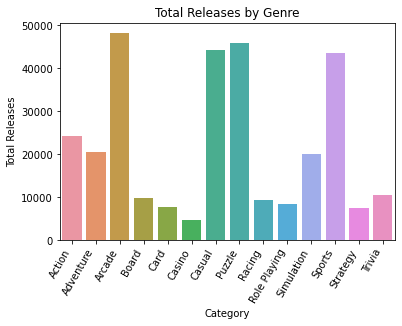

In [32]:
total_rel_genre = google.groupby(['Category']).agg({'App Name':'count'}).reset_index()
ax = sns.barplot(x='Category', y='App Name', data = total_rel_genre)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
ax.set(xlabel='Category', ylabel='Total Releases')
ax.set_title('Total Releases by Genre')
plt.show()

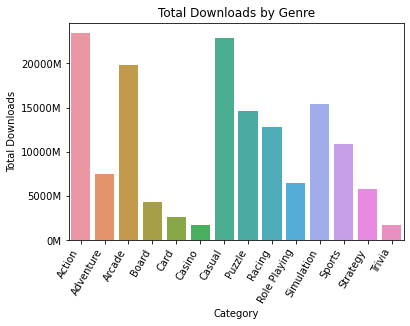

In [33]:
total_owner_genre = google.groupby(['Category']).agg({'Downloads':'sum'}).reset_index()
ax = sns.barplot(x='Category', y='Downloads', data = total_owner_genre)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
ax.set(xlabel='Category', ylabel='Total Downloads')
ax.set_title('Total Downloads by Genre')
plt.show()

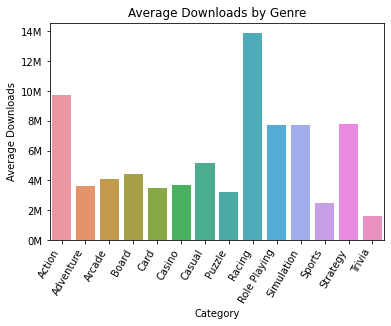

In [34]:
def millions_formatter2(x,pos):
    return '{:.0f}M'.format(x/100000)
avg_owner_genre = google.groupby(['Category']).agg({'Downloads':'mean'}).reset_index()
ax = sns.barplot(x='Category', y='Downloads', data = avg_owner_genre)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
formatter = FuncFormatter(millions_formatter2)
plt.gca().yaxis.set_major_formatter(formatter)
ax.set(xlabel='Category', ylabel='Average Downloads')
ax.set_title('Average Downloads by Genre')
plt.show()

- The most released games are Arcade, Puzzle, Casual and Sports. Casino, Trivia, Card and Board are the least released games. 
- When looking at total downloads, Action is the leader followed by  Casual and Arcade games. One step below we have Simulation, Puzzle and Racing. Casino, Trivia, Card and Board are also the games with least downloads.
- When looking at Average downloads, Racing dominates the market despite being a genre with a small number of releases. One step below Racing we have Action, Role Playing, Siumlation and Strategy. 

The genres with the most releases, such as Arcade or Puzzle, on average do not have many downloads. This may be because the success of some games in these genres has caught the attention of other developers who, seeing the success of the games, have decided to bet on the same genre. This produces a saturation of games of the same genre on the market, and not all of these games can be successful, so on average, the genre does not perform well relative to other less saturated genres.

In [43]:
average_rating = google.groupby('Category')['Rating'].mean()
print(average_rating)

Category
Action          2.791424
Adventure       2.878717
Arcade          2.542960
Board           2.842038
Card            3.142821
Casino          3.344220
Casual          2.531813
Puzzle          2.763600
Racing          3.062343
Role Playing    3.433036
Simulation      3.294050
Sports          2.383122
Strategy        2.941242
Trivia          2.654557
Name: Rating, dtype: float64


[Text(0, 0, 'Action'),
 Text(1, 0, 'Adventure'),
 Text(2, 0, 'Arcade'),
 Text(3, 0, 'Board'),
 Text(4, 0, 'Card'),
 Text(5, 0, 'Casino'),
 Text(6, 0, 'Casual'),
 Text(7, 0, 'Puzzle'),
 Text(8, 0, 'Racing'),
 Text(9, 0, 'Role Playing'),
 Text(10, 0, 'Simulation'),
 Text(11, 0, 'Sports'),
 Text(12, 0, 'Strategy'),
 Text(13, 0, 'Trivia')]

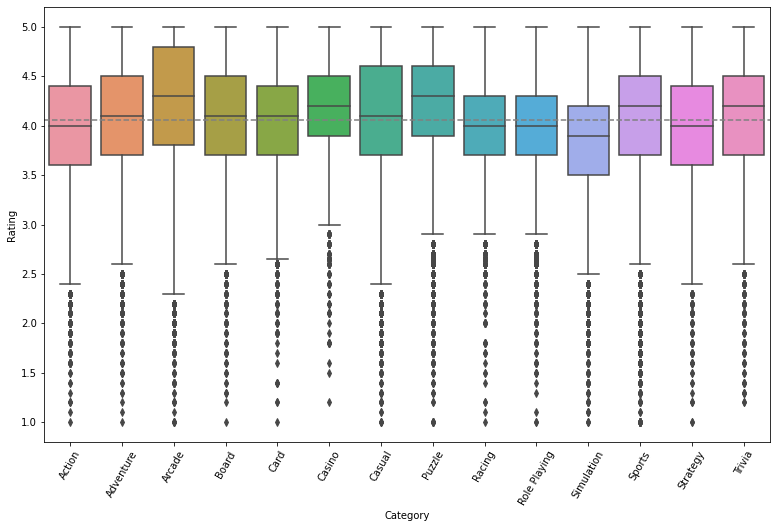

In [37]:
rating_above_1 = rating_above_1.sort_values('Category')
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.boxplot(x='Category', y='Rating', data = rating_above_1)
mean_rating = rating_above_1['Rating'].mean()
plt.axhline(y=mean_rating, color='grey', linestyle='--')
ax.set_xticklabels(ax.get_xticklabels(), rotation=60)

In [44]:
average_rating = rating_above_1.groupby('Category')['Rating'].mean()
print(average_rating)

Category
Action          3.962546
Adventure       4.054023
Arcade          4.213895
Board           4.030564
Card            4.004383
Casino          4.104758
Casual          4.073221
Puzzle          4.193046
Racing          3.969449
Role Playing    3.936877
Simulation      3.798728
Sports          4.043062
Strategy        3.932141
Trivia          4.068710
Name: Rating, dtype: float64


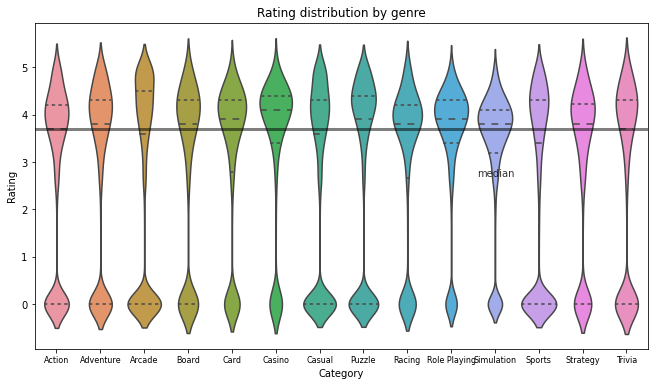

In [38]:
google = google.sort_values('Category')
fig, ax = plt.subplots(figsize=(11,6))
sns.violinplot(x='Category', y='Rating', data=google, inner='quartile', ax=ax)
ax.axhline(google.Rating.median(), color='black', lw=3, alpha=.5)
ax.text(9.6, google.Rating.median()-1, 'median', color='black', alpha=.8)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre");
plt.show()

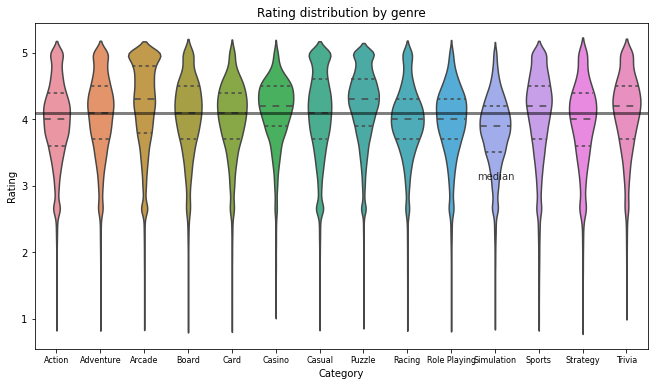

In [39]:
rating_above_1 = rating_above_1.sort_values('Category')
fig, ax = plt.subplots(figsize=(11,6))
sns.violinplot(x='Category', y='Rating', data=rating_above_1, inner='quartile', ax=ax)
ax.axhline(rating_above_1.Rating.median(), color='black', lw=3, alpha=.5)
ax.text(9.6, rating_above_1.Rating.median()-1, 'median', color='black', alpha=.8)

ax.tick_params(axis='x', labelsize=8)
ax.set_title("Rating distribution by genre");
plt.show()

As we have seen before, the games with 0 rating have an important effect on the average results of each genre. Games with more releases tend to have mora games with 0 rating. The more games are released, the bigger chance that a game will not have a rating. To make a correct interpretation of the data, we will analyze the average rating of all the games first and then we will repeat the same process only for games with a rating higher than 1.

- If we look at the average rating by genre for all games, the different genres have a rating between 2.3-3.4. Role Playing, Casino and Simulation are the best performers with ratings above 3.3 on average. The worst performers are Sports, Casual and Arcade with an average rating below 2.55. The worst performers are all genres that have a large number of releases. 
- If we remove games with less than 1 of rating, the results are absolutely different. All game genres are rated between 3.7-4.2. We have a higher average rating with smaller differences between genres. Arcade and Puzzle dominate with 4.2 of rating. Role Playing and Strategy are the worst performers with a rating near 3.93. So, when removing games with rating<1, we see that games with a lot of releases are also games with higher rating.

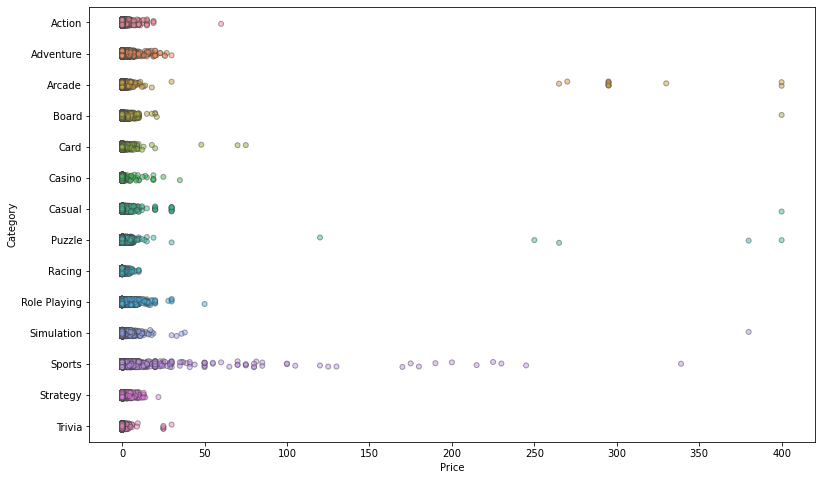

In [40]:
fig, ax = plt.subplots(figsize=(13,8))
ax = sns.stripplot(x='Price', y='Category', data=google, jitter=True, alpha=.5, linewidth=1);

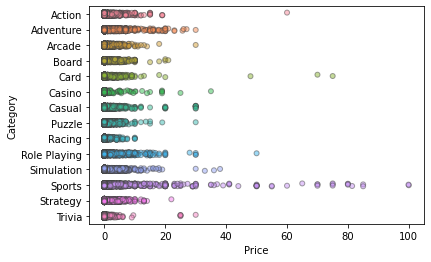

In [41]:
genres_price = google[google['Price']< 100]
ax = sns.stripplot(x='Price', y='Category', data=genres_price, jitter=True, alpha=.5, linewidth=1);

The price distribution is similar between the different genres with small differences:
- Free games dominate for all genres.
- Sports are the genre with more paid games. 
- Arcade and Puzzle do also have some paid games with high prices.

In [70]:
columns = ['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']
genre = google[['App Name', 'Downloads', 'Category']]
import warnings
warnings.filterwarnings('ignore')
genre['0k'] = np.where(genre['Downloads']==0 , 1, 0)
genre['0-10k'] = np.where((genre['Downloads']< 10000) &(prices['Downloads']>0), 1, 0)
genre['+10k'] = np.where((genre['Downloads']>= 10000)&(prices['Downloads']<50000), 1, 0)
genre['+50k'] = np.where((genre['Downloads'] >= 50000)&(prices['Downloads']<100000), 1, 0)
genre['+100k'] = np.where((genre['Downloads'] >= 100000)&(prices['Downloads']<500000), 1, 0)
genre['+500k'] = np.where((genre['Downloads'] >= 500000) &(prices['Downloads']<1000000), 1, 0)
genre['+1M'] = np.where((genre['Downloads'] >= 1000000)&(prices['Downloads']<10000000), 1, 0)
genre['+10M'] = np.where((genre['Downloads'] >= 10000000)&(prices['Downloads']<100000000), 1, 0)
genre['+100M'] = np.where((genre['Downloads'] >= 100000000)&(prices['Downloads']<1000000000), 1, 0)
genre['+1000M'] = np.where(genre['Downloads'] >= 1000000000, 1, 0)


genre

,App Name,Downloads,Category,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
218678,Asteroid Shooter,55,Action,0,1,0,0,0,0,0,0,0,0
301767,The Last Vampire,266,Action,0,1,0,0,0,0,0,0,0,0
97791,Ghost Arena,27,Action,0,1,0,0,0,0,0,0,0,0
153868,Asteroid Blaster,2,Action,0,1,0,0,0,0,0,0,0,0
97790,Endless Arena 2D,271,Action,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195130,Tapmaca,112830,Trivia,0,0,0,0,1,0,0,0,0,0
195105,Don't Tell Me,26,Trivia,0,1,0,0,0,0,0,0,0,0
195029,Trivia Together,66,Trivia,0,1,0,0,0,0,0,0,0,0
195314,Love Me Quiz,125,Trivia,0,1,0,0,0,0,0,0,0,0


In [71]:
columns = ['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']
pivot = genre.pivot_table(index='Category', values = columns, aggfunc=np.sum).sort_index()
pivot = pivot[['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']]
pivot

,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
Category,,,,,,,,,,
Action,36,15070,2834,1045,2238,813,1639,423,47,0
Adventure,37,12942,3179,1006,1702,578,892,183,8,0
Arcade,150,39385,3498,1166,1789,589,1229,332,44,1
Board,22,6112,1408,526,851,253,414,72,7,0
Card,12,3874,1320,541,1017,294,454,49,1,0
Casino,1,2244,918,316,581,203,288,42,0,0
Casual,154,31890,4157,1509,2935,1063,2001,459,30,1
Puzzle,102,33099,5388,1717,2886,794,1447,355,19,0
Racing,4,4719,1215,485,1171,432,923,268,25,0


In [72]:
columns = ['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']

# Calculate the total number of games in each category
total_games = genre.groupby('Category').size()

# Create an empty dataframe to store the percentage values
percentages = pd.DataFrame(columns=columns)

# Loop through the columns and calculate the percentages for each category
for col in columns:
    # Calculate the total number of games in each category that have more than the minimum downloads for the current column
    games_above_min_downloads = genre[genre[col]==1].groupby('Category').size()
    
    # Calculate the percentages for each category
    percentages[col] = (games_above_min_downloads / total_games) * 100

# Add the percentages to the pivot table
pivot = genre.pivot_table(index='Category', values = columns, aggfunc=np.sum).sort_index()
pivot = pivot.append(percentages)
pivot

,+1000M,+100M,+100k,+10M,+10k,+1M,+500k,+50k,0-10k,0k
Category,,,,,,,,,,
Action,0.000000,47.000000,2238.000000,423.000000,2834.000000,1639.000000,813.000000,1045.000000,15070.000000,36.000000
Adventure,0.000000,8.000000,1702.000000,183.000000,3179.000000,892.000000,578.000000,1006.000000,12942.000000,37.000000
Arcade,1.000000,44.000000,1789.000000,332.000000,3498.000000,1229.000000,589.000000,1166.000000,39385.000000,150.000000
Board,0.000000,7.000000,851.000000,72.000000,1408.000000,414.000000,253.000000,526.000000,6112.000000,22.000000
Card,0.000000,1.000000,1017.000000,49.000000,1320.000000,454.000000,294.000000,541.000000,3874.000000,12.000000
Casino,0.000000,0.000000,581.000000,42.000000,918.000000,288.000000,203.000000,316.000000,2244.000000,1.000000
Casual,1.000000,30.000000,2935.000000,459.000000,4157.000000,2001.000000,1063.000000,1509.000000,31890.000000,154.000000
Puzzle,0.000000,19.000000,2886.000000,355.000000,5388.000000,1447.000000,794.000000,1717.000000,33099.000000,102.000000
Racing,0.000000,25.000000,1171.000000,268.000000,1215.000000,923.000000,432.000000,485.000000,4719.000000,4.000000


In [73]:
pivot_perc = pivot.tail(14).copy()
pivot_perc.fillna(value=0,inplace=True)
pivot_perc = pivot_perc[['0k','0-10k','+10k', '+50k', '+100k', '+500k', '+1M','+10M','+100M','+1000M']]
pivot_perc

,0k,0-10k,+10k,+50k,+100k,+500k,+1M,+10M,+100M,+1000M
Category,,,,,,,,,,
Action,0.149099,62.414579,11.737420,4.328018,9.269000,3.367157,6.788155,1.751916,0.194657,0.000000
Adventure,0.180250,63.048668,15.486920,4.900862,8.291518,2.815804,4.345496,0.891509,0.038973,0.000000
Arcade,0.311313,81.740448,7.259822,2.419941,3.712928,1.222423,2.550692,0.689040,0.091319,0.002075
Board,0.227625,63.238489,14.568029,5.442318,8.804966,2.617693,4.283497,0.744956,0.072426,0.000000
Card,0.158688,51.229833,17.455700,7.154192,13.448823,3.887860,6.003703,0.647977,0.013224,0.000000
Casino,0.021772,48.856956,19.986937,6.880035,12.649684,4.419769,6.270411,0.914435,0.000000,0.000000
Casual,0.348424,72.150954,9.405190,3.414104,6.640422,2.405032,4.527252,1.038485,0.067875,0.002262
Puzzle,0.222673,72.257515,11.762394,3.748335,6.300347,1.733360,3.158906,0.774991,0.041478,0.000000
Racing,0.043281,51.060377,13.146505,5.247782,12.670418,4.674313,9.987016,2.899805,0.270504,0.000000


The main findings of the table are:
- Continuing with the previous results, the games with the most releases dominate in the ranks with few downloads. Arcade, Casual, Puzzle and sports dominate the 0-50k range.
- Games with less releases but that as we have seen before perform well on average, dominate for the 100k-1M range. Role Playing, Simulation or Casino perform well in these ranges.
- For the ranks with the most downloads (1M-1000M), Racing and Action dominate. Games with a lot of releases like Puzzle , Casual, Sports or Arcade fail to bring many games to a large number of downloads. These genres can be oversaturated.

In [40]:
genres = ['Adventure' 'Racing' 'Puzzle' 'Arcade' 'Board' 'Sports' 'Card' 'Trivia'
 'Strategy' 'Action' 'Simulation' 'Casual' 'Role Playing' 'Casino']
genre_dfs = {}  # create an empty dictionary to store the dataframes for each genre
for genre in genres:
    genre_df = google[google['Category'] == genre]
    genre_rat = genre_df['Rating']
    genre_dfs[genre] = genre_df  # store the dataframe for the genre in the dictionary

In [41]:
import scipy.stats as stats
genres = ['Adventure' 'Racing' 'Puzzle' 'Arcade' 'Board' 'Sports' 'Card' 'Trivia'
 'Strategy' 'Action' 'Simulation' 'Casual' 'Role Playing' 'Casino']
# create a list of dataframes for each genre
genre_dfs = [google[google['Category']==genre][['Category', 'Rating']] for genre in unique_genres]

# perform ANOVA test
f_val, p_val = stats.f_oneway(*[google['Rating'].dropna() for google in genre_dfs])

print("One-way ANOVA test results:")
print("F-value: ", f_val)
print("p-value: ", p_val)

One-way ANOVA test results:
F-value:  489.7439648592856
p-value:  0.0


In [42]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd 
tukeyHSD_results = pairwise_tukeyhsd(endog=google['Rating'], #perform the pairwise Tukey HSD test
                          groups=google['Category'],
                          alpha=0.05) # the p-value cut-off for statistical significance is defined as 0.05
print(tukeyHSD_results)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower   upper  reject
----------------------------------------------------------------
      Action    Adventure   0.0873 0.0002  0.0251  0.1495   True
      Action       Arcade  -0.2485    0.0 -0.3001 -0.1968   True
      Action        Board   0.0506 0.6639 -0.0282  0.1294  False
      Action         Card   0.3514    0.0  0.2651  0.4377   True
      Action       Casino   0.5528    0.0  0.4474  0.6582   True
      Action       Casual  -0.2596    0.0  -0.312 -0.2072   True
      Action       Puzzle  -0.0278 0.8805 -0.0799  0.0243  False
      Action       Racing   0.2709    0.0  0.1908   0.351   True
      Action Role Playing   0.6416    0.0  0.5583  0.7249   True
      Action   Simulation   0.5026    0.0    0.44  0.5652   True
      Action       Sports  -0.4083    0.0 -0.4609 -0.3557   True
      Action     Strategy   0.1498    0.0  0.0632  0.2364   True
      Action       Trivia

In [43]:
# create separate dataframes for each category
from scipy.stats import f_oneway
genres = ['Adventure' 'Racing' 'Puzzle' 'Arcade' 'Board' 'Sports' 'Card' 'Trivia'
 'Strategy' 'Action' 'Simulation' 'Casual' 'Role Playing' 'Casino']
adventure = google[google['Category'] == 'Adventure']
racing = google[google['Category'] == 'Racing']
puzzle = google[google['Category'] == 'Puzzle']
arcade = google[google['Category'] == 'Arcade']
board = google[google['Category'] == 'Board']
sports = google[google['Category'] == 'Sports']
card = google[google['Category'] == 'Card']
trivia = google[google['Category'] == 'Trivia']
strategy = google[google['Category'] == 'Strategy']
action = google[google['Category'] == 'Action']
simulation = google[google['Category'] == 'Simulation']
casual = google[google['Category'] == 'Casual']
role_playing = google[google['Category'] == 'Role Playing']
casino = google[google['Category'] == 'Casino']
# perform the ANOVA test
f_value, p_value = f_oneway(adventure['Rating'], racing['Rating'], puzzle['Rating'], arcade['Rating'], board['Rating'], sports['Rating'], card['Rating'], trivia['Rating'], strategy['Rating'], action['Rating'], simulation['Rating'], casual['Rating'], role_playing['Rating'], casino['Rating'])

# print the results
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 489.7439648592856
p-value: 0.0


A p-value of 0 indicates that the probability of observing such a large F-value by chance is extremely low, which suggests strong evidence against the null hypothesis. In this case, the null hypothesis is that the means of the ratings for each category are equal, and the alternative hypothesis is that at least one of the means is different. Since the p-value is very small, we reject the null hypothesis and conclude that there is evidence that the means of the ratings for at least one category are different from the others.
Overall, the results of the ANOVA test suggest that the category of the app has a significant impact on the rating.

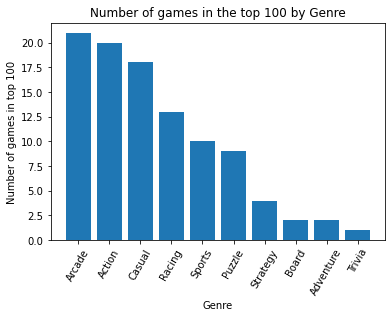

In [42]:
top_100 = google.sort_values(by='Downloads', ascending = False).head(100)
category_top100 = top_100['Category'].value_counts()
def format_func(value, tick_number):
    return int(value)
plt.bar(category_top100.index, category_top100.values)

plt.xticks(rotation=60)
plt.title('Number of games in the top 100 by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of games in top 100')
ax.yaxis.set_major_formatter(FuncFormatter(format_func))
plt.show() 

In [45]:
category_top100

Arcade       21
Action       20
Casual       18
Racing       13
Sports       10
Puzzle        9
Strategy      4
Board         2
Adventure     2
Trivia        1
Name: Category, dtype: int64

The top 100 is dominated by Arcade, Action and Casual games. Racing, Sports and Puzzle are one step below. Action games are a clear winner in the genre analysis. Despite not being a genre with a lot of releases, perform well in downloads and ratings and have an important representation in the top 100. Racing does algo do well in all those categories. 

### DEVELOPERS


In [76]:
#How is the top100 games distributed by devs?
top_100_devs = google.sort_values(by='Downloads', ascending = False).head(100)
top_devs = top_100_devs.groupby('Developer Id').agg({'App Name':'count'}).sort_values(by='App Name', ascending=False).reset_index()
top_devs_counts_gt = top_devs[top_devs['App Name'] >1]
top_devs_counts_gt


,Developer Id,App Name
0,Outfit7 Limited,7
1,King,4
2,Playrix,4
3,Supercell,4
4,Good Job Games,3
5,VOODOO,3
6,Italic Games,2
7,Imangi Studios,2
8,Halfbrick Studios,2
9,Soner Kara,2


In [78]:
top_100_devs[top_100_devs['Developer Id'] == 'Outfit7 Limited'][['App Name','Category', 'Rating','Developer Id']]

,App Name,Category,Rating,Developer Id
117013,My Talking Tom,Casual,4.3,Outfit7 Limited
42331,My Talking Angela,Casual,4.2,Outfit7 Limited
26209,Talking Tom Cat,Casual,4.0,Outfit7 Limited
76300,My Talking Tom 2,Casual,4.3,Outfit7 Limited
246080,Talking Tom Gold Run,Action,4.4,Outfit7 Limited
264815,My Talking Tom Friends,Casual,4.3,Outfit7 Limited
145710,Talking Tom Hero Dash - Run Game,Action,4.3,Outfit7 Limited


In [47]:
top_devs = google.groupby('Developer Id').agg({'Downloads':'sum'}).reset_index()
top_devs = top_devs.sort_values(by='Downloads', ascending = False).head(10)
top_devs

,Developer Id,Downloads
78446,Outfit7 Limited,2784482362
109941,VOODOO,2465788425
57928,King,2279392643
41567,Gameloft SE,1789856399
69641,Miniclip.com,1761130251
61751,Lion Studios,1598804815
91781,SYBO Games,1359692123
92871,SayGames,1358935505
100610,Supercell,1245198319
50274,Imangi Studios,1231362529


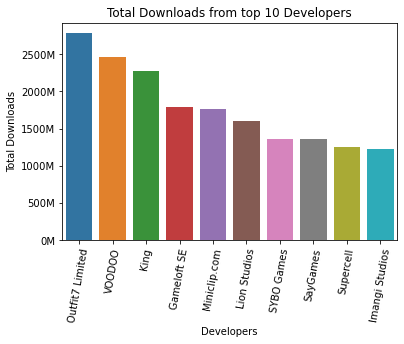

In [48]:
ax =sns.barplot(x='Developer Id', y='Downloads', data = top_devs)
ax.set(xlabel='Developers', ylabel='Total Downloads')
ax.set_title('Total Downloads from top 10 Developers')
formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xticks(rotation=80)
plt.show()

- The Top100 is composed by 20 different developer. Just 1 of these developers has more than 5 games in the top100, Outfit7 Limited with 7.


In [50]:
#Let's analyze the top 10 devs. We will have a look at releases, downloads, rating, average playtime and the number of f2p games designed
developer_stats = google.groupby('Developer Id').agg(
    total_releases=('App Name', 'count'),
    total_downloads=('Downloads', 'sum'),
    average_rating=('Rating', 'mean')).sort_values(by='total_downloads', ascending =False).head(10)
# reset the index to make Developer a column instead of the index
developer_stats = developer_stats.reset_index()

In [51]:
developer_stats

,Developer Id,total_releases,total_downloads,average_rating
0,Outfit7 Limited,14,2784482362,4.278571
1,VOODOO,96,2465788425,3.911458
2,King,16,2279392643,4.512500
3,Gameloft SE,57,1789856399,4.124561
4,Miniclip.com,19,1761130251,4.263158
5,Lion Studios,96,1598804815,3.866188
6,SYBO Games,3,1359692123,4.266667
7,SayGames,48,1358935505,4.187500
8,Supercell,6,1245198319,4.366667
9,Imangi Studios,3,1231362529,4.166667


In [52]:
#Add column of f2p games:
# count number of games with price > 0 for each developer
price_count = google.groupby('Developer Id')['Price'].apply(lambda x: (x == 0).sum())


# merge the two new columns with the previous dataframe
developer_stats = pd.merge(developer_stats, price_count, on='Developer Id')


# rename the columns
developer_stats.rename(columns={'Price':'F2P Games'}, inplace=True)
developer_stats

,Developer Id,total_releases,total_downloads,average_rating,F2P Games
0,Outfit7 Limited,14,2784482362,4.278571,14
1,VOODOO,96,2465788425,3.911458,96
2,King,16,2279392643,4.512500,16
3,Gameloft SE,57,1789856399,4.124561,52
4,Miniclip.com,19,1761130251,4.263158,19
5,Lion Studios,96,1598804815,3.866188,96
6,SYBO Games,3,1359692123,4.266667,3
7,SayGames,48,1358935505,4.187500,48
8,Supercell,6,1245198319,4.366667,6
9,Imangi Studios,3,1231362529,4.166667,3


- The Top10 devs have all more than 1200M downloads. On Steam the 10th developer with more downloads was near 50M downloads. Outfit7 Limited, Voodoo and King dominate the marketplace with more than 2000M downloads.
- There is no clear tendency in game releases. Some Developers have released near 100 games like Voodoo or Lion Studios, while other developers have just released 3 games like Sybo Games or Imangi Studios. So, some developers have 1 game hit: Sybo Games -> Subway Surfers or Imangi Studios -> Temple Run, while others developers have a more distributed portfolio of games. 
- When looking at average ratings, the games with more released have the worst average ratings. Releasing a lot of games may hurt the quality of the games. Despite this, the worst rating of the top10 devs is 3.86/5, still a high rating. King with a 4.5/5 abd Supercell with a 4.37 are the best performers in the marketplace.

## CONCLUSION

PRICE TYPE

 - Free games dominate the Google Play Store. 97% of the games released are free.
 - Free games perform better than paid games in downloads but paid games are slightly better in rating.
 - Most of the games are located in the 0-50k downloads. The gaming market is very competitive, just 10% of all the game in the Google Play Store, are above 50k downloads.
 
GENRE
 
 - Arcade, Casual, Puzzle and Sports are the games with more releases. This large number of releases implies more games with low downloads and rating. The success of some games of these genres derived in the release of a lot of games but now the market may be saturated of these genres.
 - Racing and Action games despite not having a lot of releases, on average perform well in downloads, rating and have an important representation in te top 100 games with more downloads. 
 
DEVS
 
 - Getting to the top10 devs with more downloads is hard. The top10 have all more than 1200M downloads.
 - No clear strategy in game releases. Some studios prefer to release more games than others. 
 - The number of releases may affect the game quality. Developers with more releases have on average the worst rating(despite still having a high rating)
 
COMPARISON WITH STEAM RESULTS
 
 
 - SIZE: The Google Play Store size is much bigger than steam. To get to the top10 devs on Steam, a developer needs 50M downlaods, on the Google Play Store 1200M. This is just an example to understand how big the differences are.
 
 - PRICE TYPES: The Google Play Store is largely dominated by Free games, while in Steam we have more diversity and expensive games(price above 40) performed really well.
 
 - GENRE: Some genres are specific for mobile like Puzzle and Arcade. On Steam, Indie games were the more released game while we don't have these category distinctionin the Google Play Store. Action games is a genre that perform well in both platforms.
 
 - DEVS: Valve is the clear king in the Steam marketplace and developers in Steam do not release a lot of games. In the Google PlayStore, we do not have a clear king and developers release more games.